In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
per_game = pd.read_csv('data/per_game.csv')
per_poss = pd.read_csv('data/per_poss.csv')
advanced = pd.read_csv('data/advanced.csv')
transfers = pd.read_csv('data/transfers.csv')

In [5]:
per_game.drop(columns=[per_game.columns[0], 'Unnamed: 27'], axis=1, inplace=True)
per_poss.drop(columns=[per_poss.columns[0], 'Unnamed: 25'], axis=1, inplace=True)
advanced.drop(columns=[advanced.columns[0], 'Unnamed: 20', 'Unnamed: 25'], axis=1, inplace=True)
transfers = transfers[["srcbb_name", "Name", "Class", "Ht", "Wt", "Immediately Eligible", "January Eligible"]]

In [6]:
#joining tables
data = pd.merge(transfers, per_game, how='right', left_on = 'srcbb_name', right_on = 'Name').drop('Name_y', axis=1)
data = pd.merge(data, advanced, how='left', left_on = 'srcbb_name', right_on = 'Name').drop(['Name', 'Season_y', 'School_y', 'Conf_y', 'G_y', 'GS_y',
       'MP_y'], axis=1)
data = pd.merge(data, per_poss[['Name', 'ORtg', 'DRtg']], how='left', left_on = 'srcbb_name', right_on = 'Name').drop('Name', axis=1)


In [7]:
data.rename(columns={"Name_x": "Name", "Season_x": "Season", "School_x": "School", "Conf_x": "Conf", "G_x": "G", "GS_x": "GS", "MP_x": "MP"}, inplace=True)

In [8]:
#filter out anyone who plays less than 9 minutes based on Bill Goldblatt of 82games.com, scaled down from NBA game
data = data[(data['MP'] >= 9) & (data['3P'] > 0) & (data['3PA'] > 0) & (data['Season'] == '2021-22')]
data

,srcbb_name,Name,Class,Ht,Wt,Immediately Eligible,January Eligible,Season,School,Conf,...,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,ORtg,DRtg
0,kani-acree,Kani Acree,RS SO,78,185,NaN,NaN,2021-22,Ball State,MAC,...,15.9,0.0,0.1,0.1,0.042,-2.0,-0.6,-2.6,95.5,109.5
2,kim-aikenjr,"Kim Aiken, Jr.",RS JR,79,215,Yes,NaN,2021-22,Arizona,Pac-12,...,15.4,0.4,0.2,0.6,0.259,6.5,6.4,12.9,139.0,88.7
4,dominique-alexander,Dominique Alexander,SR,70,160,NaN,NaN,2021-22,Chicago State,WAC,...,18.4,0.5,0.2,0.8,0.054,-1.6,-1.0,-2.6,100.7,111.8
16,junior-ballard,Junior Ballard,JR,75,185,Yes,NaN,2021-22,Fresno State,MWC,...,15.9,0.6,0.7,1.3,0.122,-0.3,2.2,1.8,109.5,98.3
19,timothy-barnes,Timothy Barnes,FR,75,180,NaN,NaN,2021-22,Kansas City,Summit,...,15.2,0.6,0.5,1.0,0.156,-1.6,0.6,-1.0,119.5,97.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,shaun-williams,Shaun Williams,RS SO,75,175,Yes,NaN,2021-22,Cal State Bakersfield,Big West,...,27.5,-0.1,0.3,0.3,0.056,-5.1,0.4,-4.7,88.0,98.3
388,alec-woodard,Alec Woodard,SO,74,200,Yes,NaN,2021-22,Austin Peay,OVC,...,15.6,0.4,0.6,1.0,0.081,-3.1,0.3,-2.8,100.9,103.4
391,michael-wynn,Michael Wynn,JR,78,210,NaN,NaN,2021-22,Akron,MAC,...,15.0,0.2,0.5,0.7,0.121,-3.7,3.3,-0.4,101.6,93.3
393,brandon-younger,Brandon Younger,JR,79,190,NaN,NaN,2021-22,Presbyterian,Big South,...,16.6,0.6,1.0,1.6,0.100,-2.3,0.5,-1.8,102.0,99.0


In [9]:
#3PT Rating = (3PT% * (3PA/MP)) * (1 + (.0075 * MPG)) taken from Goldblatt
data['3PT Rating'] = data.apply(lambda player : 100*(player['3P%'])*(player['3PA']/(player['MP']*player['G']))*
                        (1+(.0075*player['MP']))
                            , axis=1)

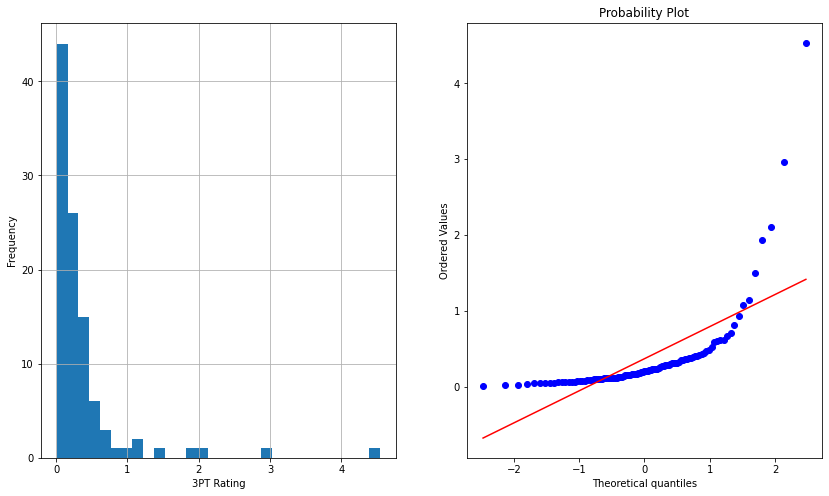

In [10]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
data['3PT Rating'].hist(bins=30)
plt.xlabel('3PT Rating')
plt.ylabel('Frequency')

## QQ plot
plt.subplot(1,2,2)
stats.probplot(data['3PT Rating'], dist="norm", plot=plt)
plt.show()

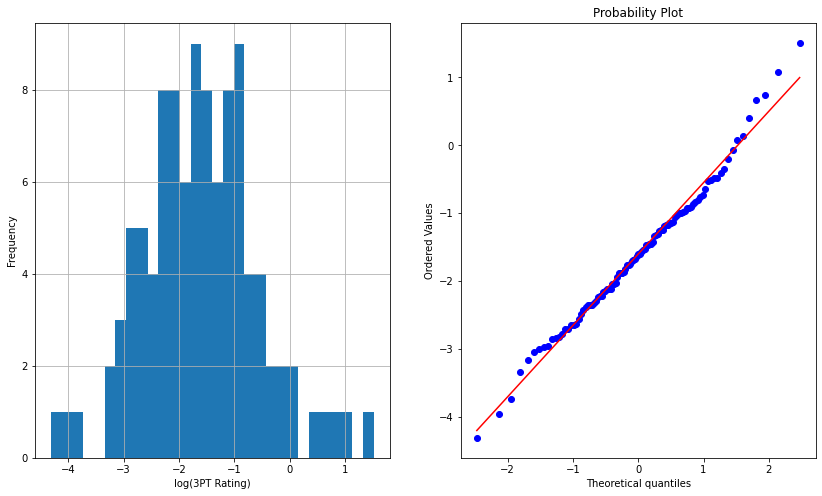

In [11]:
#logarithmic transformation for more normal distribution
data["3PT Rating Log"] = np.log(data["3PT Rating"])
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
data['3PT Rating Log'].hist(bins=30)
plt.xlabel('log(3PT Rating)')
plt.ylabel('Frequency')

## QQ plot
plt.subplot(1,2,2)
stats.probplot(data['3PT Rating Log'], dist="norm", plot=plt)
plt.show()

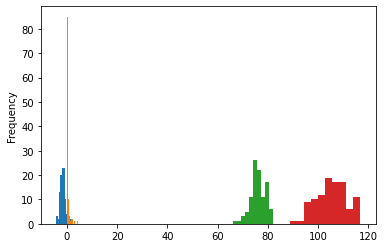

In [12]:
data['3PT Rating Log'].plot.hist(); # Blue
data['3PT Rating'].plot.hist(); #Orange
data['Ht'].plot.hist(); #Green
data['DRtg'].plot.hist(); #Red

In [16]:
#custom defensive stat to balance player and team defense
data['D Adj'] = .5*stats.zscore(data['DRtg'], nan_policy='omit') + .5*stats.zscore(data['DWS'], nan_policy='omit') + stats.zscore(data['SOS'])
data['total_z'] = data['D Adj'] + stats.zscore(data['Ht']) + stats.zscore(data['3PT Rating Log'])

In [17]:
per_game.to_csv('data/per_game.csv', index=False)
per_poss.to_csv('data/per_poss.csv', index=False)
advanced.to_csv('data/advanced.csv', index=False)
data.to_csv('data/data.csv', index=False)